> `TF 2.0 supports eager execution so don't explicitly create a session and run the code in it, instead you do it the conventional way`

In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

- **```constants```**

In [2]:
a = tf.constant([[3, 2], [8, 6]], tf.int16) 

In [3]:
b = tf.constant([[4, 8], [3, 7]], tf.int16)

In [4]:
c = a*b
c

<tf.Tensor: shape=(2, 2), dtype=int16, numpy=
array([[12, 16],
       [24, 42]], dtype=int16)>

In [5]:
# or
c.numpy()

array([[12, 16],
       [24, 42]], dtype=int16)

In [6]:
c = tf.multiply(a, b)
c.numpy()

array([[12, 16],
       [24, 42]], dtype=int16)

- **```zeros and ones```**

In [7]:
zero_tensor = tf.zeros([3, 5])
zero_tensor.numpy()

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
one_tensor = tf.ones([4, 4])
one_tensor

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [9]:
fill_tensor = tf.fill([2, 2, 3], 81.0)
fill_tensor

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[81., 81., 81.],
        [81., 81., 81.]],

       [[81., 81., 81.],
        [81., 81., 81.]]], dtype=float32)>

In [10]:
lin_tensor = tf.linspace(5., 9., 5)
lin_tensor.numpy()

array([5., 6., 7., 8., 9.], dtype=float32)

In [11]:
range_tensor = tf.range(3., 11., delta=0.5)
range_tensor.numpy()

array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,
        8.5,  9. ,  9.5, 10. , 10.5], dtype=float32)

In [12]:
range_tensor = tf.range(3., 7., delta=0.5)
range_tensor.numpy()

array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5], dtype=float32)

- **```Tensors with Random Values```**

In [13]:
rnd_ints = tf.random.normal([10], dtype=tf.float64)
range_tensor.numpy()

array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5], dtype=float32)

In [14]:
rnd_ints = tf.random.uniform([10], dtype=tf.float64)
rnd_ints  # shuffle

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([0.69854831, 0.94813471, 0.8156069 , 0.57380793, 0.84795404,
       0.7354926 , 0.93124809, 0.29374708, 0.60920879, 0.25192134])>

- **```Transforming Tensors```**

In [15]:
vec = tf.constant([1., 2., 3., 4.])
mat = tf.reshape(vec, [2, 2])
mat

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [16]:
mat = tf.constant([[1., 2., 3.], [4., 5., 6.]])
rev_mat = tf.reverse(mat, [1])  # 0 is across x axis i.e rows
# 1 is across y axis i.e columns
rev_mat

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[3., 2., 1.],
       [6., 5., 4.]], dtype=float32)>

In [17]:
mat = tf.constant([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
# works same as select and drag(and leave)
slice_mat = tf.slice(mat, [1, 1], [2, 2])
slice_mat

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[5., 6.],
       [8., 9.]], dtype=float32)>

In [18]:
t1 = tf.constant([1., 2.])
t2 = tf.constant([3., 4.])
t3 = tf.constant([5., 6.])
t4 = tf.stack([t1, t2, t3])
t4

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)>

 -                                          **```Operations```**

 | Function | Description |
 |   ---     |       ---    |
 | add(x, y, name=None)     |  Adds two tensors                     |  
 | subtract(x, y, name=None)|  Subtracts two tensors                |  
 | multiply(x, y, name=None)|  Multiplies two tensors               |  
 | divide(x, y, name=None)  |  Divides the elements of two tensors  |  
 | div(x, y, name=None)     |  Divides the elements of two tensors  |  
 | add_n(inputs, name=None) |  Adds multiple tensors                |  
 | scalar_mul(scalar, x)    |  Scales a tensor by a scalar value    |
 | mod(x, y, name=None)     |  Performs the modulo operation        |  
 | abs(x, name=None)        |  Computes the absolute value          |  
 | negative(x, name=None)   |  Negates the tensor’s elements        |  
 | sign(x, name=None)       |  Extracts the signs of the tensor’s element |  
 | reciprocal(x, name=None) |  Computes the reciprocals             |  

In [19]:
a = tf.constant([3., 3., 3.])
b = tf.constant([2., 2., 2.])
sum = tf.add(a, b)
diff = tf.subtract(a, b)
prod = tf.multiply(a, b)
quot = tf.divide(a, b)

print(sum.numpy(), diff.numpy(), prod.numpy(), quot.numpy())

[5. 5. 5.] [1. 1. 1.] [6. 6. 6.] [1.5 1.5 1.5]


In [20]:
# combining all the above

# Math with constant tensors
const_a = tf.constant(3.6)
const_b = tf.constant(1.2)
total = const_a + const_b
quot = tf.math.divide(const_a, const_b)

# Math with random tensors
rand_a = tf.random.normal([3], 2.0)
rand_b = tf.random.uniform([3], 1.0, 4.0)
diff = tf.subtract(rand_a, rand_b)


# Vector multiplication
vec_a = tf.linspace(0.0, 3.0, 4)
vec_b = tf.fill([4, 1], 2.0)
prod = tf.multiply(vec_a, vec_b)
dot = tf.tensordot(vec_a, vec_b, 1, 'nox')

# Matrix multiplication
mat_a = tf.constant([[2, 3], [1, 2], [4, 5]])
mat_b = tf.constant([[6, 4, 1], [3, 7, 2]])
mat_prod = tf.matmul(mat_a, mat_b)


# Execute the operations
print("Sum: %f" % (total))
print("Quotient: %f" % (quot))
print("Difference: ", (diff))
print("Element-wise product: ", (prod))
print("Dot product: ", (dot))
print("Matrix product: ", (mat_prod))

Sum: 4.800000
Quotient: 3.000000
Difference:  tf.Tensor([-1.8891132  -0.53697693  0.63869405], shape=(3,), dtype=float32)
Element-wise product:  tf.Tensor(
[[0. 2. 4. 6.]
 [0. 2. 4. 6.]
 [0. 2. 4. 6.]
 [0. 2. 4. 6.]], shape=(4, 4), dtype=float32)
Dot product:  tf.Tensor([12.], shape=(1,), dtype=float32)
Matrix product:  tf.Tensor(
[[21 29  8]
 [12 18  5]
 [39 51 14]], shape=(3, 3), dtype=int32)


- **```Derivatives```**

In [21]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = 3 * w ** 7 * np.log(w + 1)

grad = tape.gradient(loss, w)

print(grad)  # => tf.Tensor([[ 2.]], shape=(1, 1), dtype=float32)

tf.Tensor([[14.556091]], shape=(1, 1), dtype=float32)


In [22]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x
    
dy_dx = g.gradient(y, x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [48]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
  tape.watch(x1)
  y0 = tf.math.sin(x0)
  y1 = tf.nn.softplus(x1)
  y = y0 + y1
  ys = tf.reduce_sum(y)

In [49]:
# dy = 2x * dx
grad = tape.gradient(ys, {'x0': x0, 'x1': x1})

print('dy/dx0:', grad['x0'])
print('dy/dx1:', grad['x1'].numpy())

dy/dx0: None
dy/dx1: 0.9999546


In [50]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  y = x * x
  z = y * y

print(tape.gradient(z, x).numpy())  # 108.0 (4 * x**3 at x = 3)
print(tape.gradient(y, x).numpy())  # 6.0 (2 * x)

[  4. 108.]
[2. 6.]


In [51]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)

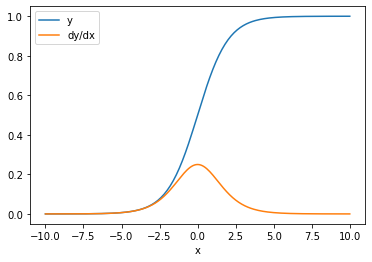

In [54]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x') # https://www.tensorflow.org/guide/autodiff

 - **`cpu and gpu performance `**

In [23]:
import time


def measure(x, steps):
    # TensorFlow initializes a GPU the first time it's used, exclude from timing.
    tf.matmul(x, x)
    start = time.time()
    for i in range(steps):
        x = tf.matmul(x, x)
    # tf.matmul can return before completing the matrix multiplication
    # (e.g., can return after enqueing the operation on a CUDA stream).
    # The x.numpy() call below will ensure that all enqueued operations
    # have completed (and will also copy the result to host memory,
    # so we're including a little more than just the matmul operation
    # time).
    _ = x.numpy()
    end = time.time()
    return end - start


shape = (1000, 1000)
steps = 200
print("Time to multiply a {} matrix by itself {} times:".format(shape, steps))

# Run on CPU:
with tf.device("/cpu:0"):
    print("CPU: {} secs".format(measure(tf.random.normal(shape), steps)))

# Run on GPU, if available:
if tf.config.experimental.list_physical_devices("GPU"):
    with tf.device("/gpu:0"):
        print("GPU: {} secs".format(measure(tf.random.normal(shape), steps)))
else:
    print("GPU: not found")

Time to multiply a (1000, 1000) matrix by itself 200 times:
CPU: 3.311143636703491 secs
GPU: 0.6771783828735352 secs


In [24]:
# This will be an int32 tensor by default; see "dtypes" below.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [35]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

tf.reduce_max(c)
# Find the largest value
print(tf.reduce_max(c).numpy())
# Find the index of the largest value
print(tf.argmax(c).numpy())
# Compute the softmax
print(tf.nn.softmax(c).numpy())

10.0
[1 0]
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]]


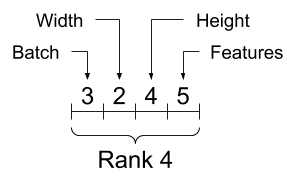

In [37]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(3, 2, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

- **`Ragged Tensors`**

In [55]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

try:
    tensor = tf.constant(ragged_list)
except Exception as e:
    print(f"{type(e).__name__}: {e}")

ValueError: Can't convert non-rectangular Python sequence to Tensor.


In [40]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


In [41]:
# If we have three string tensors of different lengths, this is OK.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# Note that the shape is (3,). The string length is not included.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


- **`variables`**

In [46]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])
bool_variable

<tf.Variable 'Variable:0' shape=(4,) dtype=bool, numpy=array([False, False, False,  True])>

> `graphs are extremely useful and let your TensorFlow run fast, run in parallel, and run efficiently on multiple devices.`